In [1]:
print("test")

test


## Visualizing data and files present

In [9]:
import os
import re
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt


In [5]:
folder_path = "../data/eye_movement_type"

pattern = r"EyeT_group_dataset.*_participant_(\d+)_trial_(\d+)\.csv"

participant_data_count = defaultdict(int)
participant_trials = defaultdict(set)

In [6]:


for file_name in os.listdir(folder_path):
    #Checkin to match regex
    match = re.match(pattern, file_name)
    if match:
        participant_id = int(match.group(1))
        trial_id = int(match.group(2))
        
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)
        
        participant_data_count[participant_id] += len(data)
        participant_trials[participant_id].add(trial_id)


In [7]:
#final result
total_participants = len(participant_data_count)
result_summary = {
    participant: {
        "data_points": participant_data_count[participant],
        "num_trials": len(participant_trials[participant]),
    }
    for participant in participant_data_count
}


In [8]:
print(f"Total participants: {total_participants}")
print("Summary for each participant:")
for participant, summary in result_summary.items():
    print(f"Participant {participant}: {summary}")


Total participants: 3
Summary for each participant:
Participant 2: {'data_points': 8798, 'num_trials': 3}
Participant 4: {'data_points': 1530, 'num_trials': 2}
Participant 56: {'data_points': 7223, 'num_trials': 1}


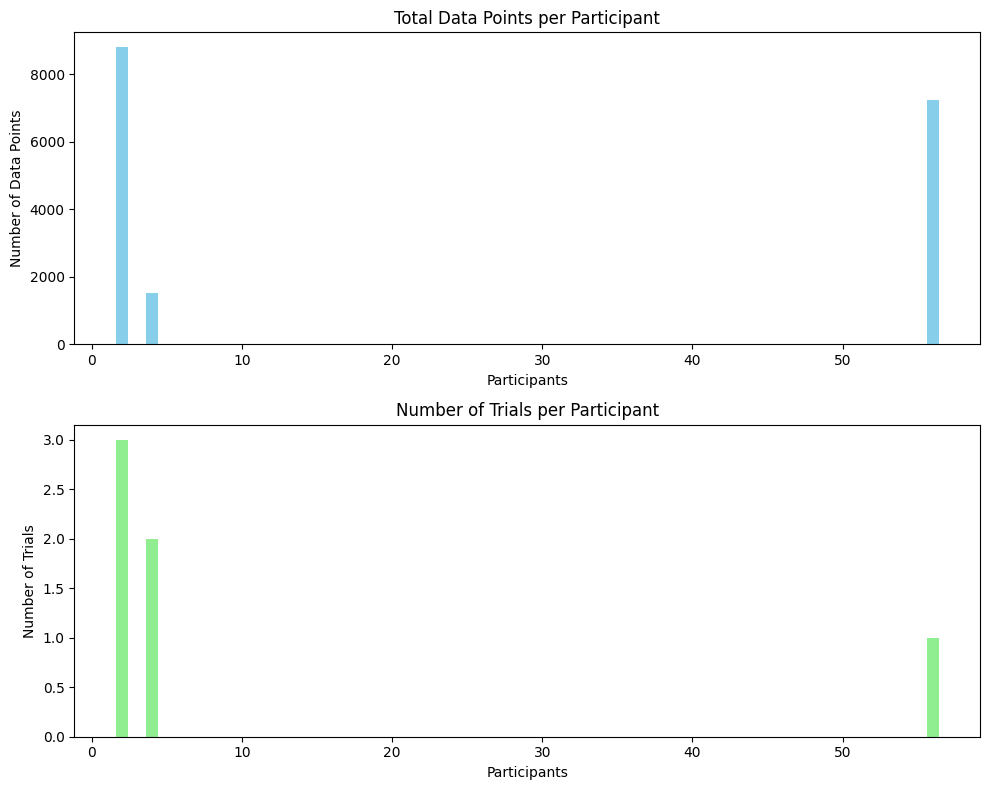

In [ ]:
participants = list(participant_data_count.keys())  #Participant IDs
data_points = [participant_data_count[participant] for participant in participants]
num_trials = [len(participant_trials[participant]) for participant in participants]

##Subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

## bar chart for total data points per participant
ax[0].bar(participants, data_points, color='skyblue')
ax[0].set_title('Total Data Points per Participant')
ax[0].set_xlabel('Participants')
ax[0].set_ylabel('Number of Data Points')

#bar chart for number of trials
ax[1].bar(participants, num_trials, color='lightgreen')
ax[1].set_title('Number of Trials per Participant')
ax[1].set_xlabel('Participants')
ax[1].set_ylabel('Number of Trials')

plt.tight_layout()
plt.show()


## Combining csv data

In [ ]:
## combining csv files
import os
import pandas as pd

folder_path = "../data/eye_movement_type"
output_file = "../data/eye_movement_type/combined_data.csv"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dataframes = []

# Loop through
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_csv(output_file, index=False)
print(f"Combined data saved to {output_file}")


## Machine learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft

In [ ]:
df = pd.read_csv("../data/eye_movement_type/combined_data.csv")
df

In [ ]:
df.columns

In [ ]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Participant name", data=df, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Participant name")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
df

In [ ]:
#columns of interest
columns_of_interest = [
    "Gaze point X", "Gaze point Y", "Gaze event duration", 
    "Gaze direction left X", "Gaze direction left Y", "Gaze direction left Z",
    "Pupil diameter left", "Pupil diameter right",
    "Fixation point X", "Fixation point Y",
    "Gaze point left X", "Gaze point right X",
    "Gaze point left Y", "Gaze point right Y",
    "Participant name"
]


In [ ]:
# Filter the dataframe to include only the relevant columns
df = df[columns_of_interest]
df

In [ ]:
# Clean the data: Replace commas with dots and convert columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df.loc[:, col] = df[col].str.replace(',', '.').astype(float, errors='ignore')

df

In [ ]:
print("Dataset Overview:")
print(df.info())

In [ ]:
print("\nSummary Statistics:")
print(df.describe())

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# imputing values:
def impute_missing_values(df, columns, strategy="median"):
    """
    Impute missing values in the specified columns of the DataFrame in place.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        columns (list): List of column names to impute.
        strategy (str): Imputation strategy - "median", "mean", or "mode".
    """
    for col in columns:
        if col in df.columns:
            if strategy == "median":
                imputed_value = df[col].median()
            elif strategy == "mean":
                imputed_value = df[col].mean()
            elif strategy == "mode":
                imputed_value = df[col].mode()[0]  # Get the first mode value
            else:
                raise ValueError("Invalid strategy. Use 'median', 'mean', or 'mode'.")
            
            # Impute missing values in-place
            df[col].fillna(imputed_value, inplace=True)
        else:
            print(f"Column '{col}' not found in DataFrame.")


In [ ]:
df

In [ ]:
columns_of_interest = [
    "Gaze point X", "Gaze point Y", "Gaze event duration", 
    "Gaze direction left X", "Gaze direction left Y", "Gaze direction left Z",
    "Pupil diameter left", "Pupil diameter right",
    "Fixation point X", "Fixation point Y",
    "Gaze point left X", "Gaze point right X",
    "Gaze point left Y", "Gaze point right Y"
]

impute_missing_values(df, columns_of_interest, strategy="median")

# Check for missing values after imputation
print("Missing values after imputation:")
print(df.isnull().sum())

##########


In [ ]:
df.info()

In [ ]:
# Handle missing values
df = df.dropna() 
df

In [ ]:
df_numeric = df.drop("Participant name", axis = 1)
plt.figure(figsize=(12, 8))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:

import math

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

num_cols = 4 
num_rows = math.ceil(len(numeric_columns) / num_cols) #calculating rrequired rows

plt.figure(figsize=(num_cols * 4, num_rows * 4))
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

In [ ]:
# Pairplot for Pairwise Relationships (only for a subset to avoid clutter)
selected_cols = ["Gaze point X", "Gaze point Y", "Pupil diameter left", "Participant name"]
sns.pairplot(df[selected_cols], hue="Participant name", palette="Set1")
plt.show()

In [ ]:
# Boxplot to Detect Outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=col, data=df, palette="Set3")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Participant name", data=df, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Participant name")
plt.ylabel("Count")
plt.show()

## Feature Engineering

In [ ]:
gaze_x = df["Gaze point X"].values
gaze_y = df["Gaze point Y"].values


fixation_durations = df["Gaze event duration"].values

pupil_diameter_left = df["Pupil diameter left"].values
pupil_diameter_right = df["Pupil diameter right"].values
gaze_point_left_x = df["Gaze point left X"].values
gaze_point_right_x = df["Gaze point right X"].values
gaze_point_left_y = df["Gaze point left Y"].values
gaze_point_right_y = df["Gaze point right Y"].values


participant_name = df["Participant name"].values

In [ ]:
df["Pupil diameter right"]

In [ ]:
df.describe()

In [ ]:
# Function to extract time-domain features
def extract_time_domain_features(gaze_x, gaze_y):
    mean_x = np.mean(gaze_x)
    std_x = np.std(gaze_x)
    mean_y = np.mean(gaze_y)
    std_y = np.std(gaze_y)
    
    # Velocity (difference between consecutive points)
    velocity_x = np.diff(gaze_x)
    velocity_y = np.diff(gaze_y)
    mean_velocity_x = np.mean(velocity_x)
    std_velocity_x = np.std(velocity_x)
    mean_velocity_y = np.mean(velocity_y)
    std_velocity_y = np.std(velocity_y)

    return [mean_x, std_x, mean_y, std_y, mean_velocity_x, std_velocity_x, mean_velocity_y, std_velocity_y]

In [ ]:
def extract_frequency_domain_features(gaze_x, gaze_y):
    ##FFT to gaze coordinates (X, Y)
    fft_x = fft(gaze_x)
    fft_y = fft(gaze_y)
    
    ## Get the power spectral density (absolute value squared)
    psd_x = np.abs(fft_x) ** 2
    psd_y = np.abs(fft_y) ** 2
    
    #Dominant frequency (index of the max value)
    dominant_freq_x = np.argmax(psd_x)
    dominant_freq_y = np.argmax(psd_y)
    
    #Power at dominant frequency
    power_x = psd_x[dominant_freq_x]
    power_y = psd_y[dominant_freq_y]
    
    return [dominant_freq_x, power_x, dominant_freq_y, power_y]


In [ ]:
def extract_spatial_features(gaze_x, gaze_y):
    # Mean and standard deviation of gaze point dispersion
    mean_dispersion_x = np.mean(np.abs(gaze_x - np.mean(gaze_x)))
    std_dispersion_x = np.std(np.abs(gaze_x - np.mean(gaze_x)))
    mean_dispersion_y = np.mean(np.abs(gaze_y - np.mean(gaze_y)))
    std_dispersion_y = np.std(np.abs(gaze_y - np.mean(gaze_y)))
    
    # Distance between consecutive gaze points
    distances = np.sqrt(np.diff(gaze_x)**2 + np.diff(gaze_y)**2)
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    
    ##Angles between consecutive gaze points
    angles = np.arctan2(np.diff(gaze_y), np.diff(gaze_x))
    mean_angle = np.mean(angles)
    std_angle = np.std(angles)
    
    return [mean_dispersion_x, std_dispersion_x, mean_dispersion_y, std_dispersion_y, mean_distance, std_distance, mean_angle, std_angle]


In [ ]:
# behavioral features
def extract_behavioral_features(fixation_durations, pupil_diameter_left, pupil_diameter_right, gaze_point_left_x, gaze_point_right_x, gaze_point_left_y, gaze_point_right_y):
    # Fixation duration statistics
    mean_fixation_duration = np.mean(fixation_durations)
    std_fixation_duration = np.std(fixation_durations)
    
    # Pupil diameter asymmetry
    pupil_asymmetry = pupil_diameter_left - pupil_diameter_right
    mean_pupil_asymmetry = np.mean(pupil_asymmetry)
    std_pupil_asymmetry = np.std(pupil_asymmetry)
    
    # Left-right eye gaze asymmetry
    gaze_asymmetry_x = gaze_point_left_x - gaze_point_right_x
    gaze_asymmetry_y = gaze_point_left_y - gaze_point_right_y
    mean_gaze_asymmetry_x = np.mean(gaze_asymmetry_x)
    std_gaze_asymmetry_x = np.std(gaze_asymmetry_x)
    mean_gaze_asymmetry_y = np.mean(gaze_asymmetry_y)
    std_gaze_asymmetry_y = np.std(gaze_asymmetry_y)
    
    return [
        mean_fixation_duration, std_fixation_duration,
        mean_pupil_asymmetry, std_pupil_asymmetry,
        mean_gaze_asymmetry_x, std_gaze_asymmetry_x,
        mean_gaze_asymmetry_y, std_gaze_asymmetry_y
    ]


In [ ]:

def extract_frequency_domain_features_enhanced(gaze_x, gaze_y):
    fft_x = fft(gaze_x)
    fft_y = fft(gaze_y)
    
    ##power spectral density
    psd_x = np.abs(fft_x) ** 2
    psd_y = np.abs(fft_y) ** 2
    
    # Divide into bands (low, mid, high frequencies)
    n = len(psd_x)
    low_band_x = np.sum(psd_x[:n // 3])
    mid_band_x = np.sum(psd_x[n // 3: 2 * n // 3])
    high_band_x = np.sum(psd_x[2 * n // 3:])
    
    low_band_y = np.sum(psd_y[:n // 3])
    mid_band_y = np.sum(psd_y[n // 3: 2 * n // 3])
    high_band_y = np.sum(psd_y[2 * n // 3:])
    
    # Spectral entropy
    total_power_x = np.sum(psd_x)
    entropy_x = -np.sum((psd_x / total_power_x) * np.log2(psd_x / total_power_x + 1e-12))  # Avoid log(0)
    total_power_y = np.sum(psd_y)
    entropy_y = -np.sum((psd_y / total_power_y) * np.log2(psd_y / total_power_y + 1e-12))  # Avoid log(0)
    
    return [low_band_x, mid_band_x, high_band_x, entropy_x, low_band_y, mid_band_y, high_band_y, entropy_y]


In [ ]:
# Combine all feature extraction
def extract_all_features(gaze_x, gaze_y, fixation_durations, pupil_diameter_left, pupil_diameter_right, gaze_point_left_x, gaze_point_right_x, gaze_point_left_y, gaze_point_right_y):
    time_features = extract_time_domain_features(gaze_x, gaze_y)
    spatial_features = extract_spatial_features(gaze_x, gaze_y)
    behavioral_features = extract_behavioral_features(
        fixation_durations,
        pupil_diameter_left, pupil_diameter_right,
        gaze_point_left_x, gaze_point_right_x,
        gaze_point_left_y, gaze_point_right_y
    )
    freq_features = extract_frequency_domain_features_enhanced(gaze_x, gaze_y)
    
    # Combine all features
    return time_features + spatial_features + behavioral_features + freq_features


In [77]:
len(gaze_x)

35102

In [82]:
time_domain_features = []
for i in range(0, len(gaze_x)):  # Step size: 100
    # Extract time-domain features
    time_domain_features.append(extract_time_domain_features(gaze_x[i:i+100], gaze_y[i:i+100]))

In [83]:

len(time_domain_features)

35102

In [103]:
time_domain_features = []
frequency_domain_features = []
spatial_features = []
behavioral_features = []
enhanced_frequency_features = []

##Iterate through the dataset with a window size of 100 data points
for i in range(0, len(gaze_x)):
    
    time_domain_features.append(extract_time_domain_features(gaze_x[i:i+100], gaze_y[i:i+100]))
    frequency_domain_features.append(extract_frequency_domain_features(gaze_x[i:i+100], gaze_y[i:i+100]))
    spatial_features.append(extract_spatial_features(gaze_x[i:i+100], gaze_y[i:i+100]))
    behavioral_features.append(extract_behavioral_features(
        fixation_durations[i:i+100],
        pupil_diameter_left[i:i+100], pupil_diameter_right[i:i+100],
        gaze_point_left_x[i:i+100], gaze_point_right_x[i:i+100],
        gaze_point_left_y[i:i+100], gaze_point_right_y[i:i+100]
    ))
    enhanced_frequency_features.append(extract_frequency_domain_features_enhanced(gaze_x[i:i+100], gaze_y[i:i+100]))

# Convert extracted features into DataFrames
time_domain_df = pd.DataFrame(time_domain_features, columns=["mean_x", "std_x", "mean_y", "std_y", 
                                                             "mean_velocity_x", "std_velocity_x", 
                                                             "mean_velocity_y", "std_velocity_y"])

frequency_domain_df = pd.DataFrame(frequency_domain_features, columns=["dominant_freq_x", "power_x", 
                                                                        "dominant_freq_y", "power_y"])

spatial_df = pd.DataFrame(spatial_features, columns=["mean_dispersion_x", "std_dispersion_x", 
                                                     "mean_dispersion_y", "std_dispersion_y", 
                                                     "mean_distance", "std_distance", 
                                                     "mean_angle", "std_angle"])

behavioral_df = pd.DataFrame(behavioral_features, columns=["mean_fixation_duration", "std_fixation_duration", 
                                                           "mean_pupil_asymmetry", "std_pupil_asymmetry", 
                                                           "mean_gaze_asymmetry_x", "std_gaze_asymmetry_x", 
                                                           "mean_gaze_asymmetry_y", "std_gaze_asymmetry_y"])

enhanced_frequency_df = pd.DataFrame(enhanced_frequency_features, columns=["low_band_x", "mid_band_x", "high_band_x", "entropy_x", 
                                                                            "low_band_y", "mid_band_y", "high_band_y", "entropy_y"])

# Combine all features into a single DataFrame
all_features_df = pd.concat([time_domain_df, frequency_domain_df, spatial_df, behavioral_df, enhanced_frequency_df], axis=1)


In [86]:
all_features_df

,mean_x,std_x,mean_y,std_y,mean_velocity_x,std_velocity_x,mean_velocity_y,std_velocity_y,dominant_freq_x,power_x,...,mean_gaze_asymmetry_y,std_gaze_asymmetry_y,low_band_x,mid_band_x,high_band_x,entropy_x,low_band_y,mid_band_y,high_band_y,entropy_y
0,963.53,161.478695,366.630000,76.509693,0.000000,41.039523,0.191919,17.427296,0,9.283901e+09,...,23.61,51.579821,9.413452e+09,1.626764e+06,1.295752e+08,2.559276e-01,1.373324e+09,2.317768e+05,2.915748e+07,3.466551e-01
1,963.54,161.475040,366.910000,76.835551,0.010101,41.039645,0.282828,17.449518,0,9.284093e+09,...,24.05,51.768596,9.413637e+09,1.630861e+06,1.295674e+08,2.558990e-01,1.375636e+09,2.181649e+05,2.941219e+07,3.489620e-01
2,963.54,161.475040,367.190000,77.159017,-2.848485,29.544476,0.878788,16.389990,0,9.284093e+09,...,24.48,51.944678,9.413637e+09,1.630861e+06,1.295674e+08,2.558990e-01,1.377924e+09,2.537639e+05,2.964258e+07,3.517698e-01
3,960.78,160.001099,368.170000,77.971669,-3.161616,29.283604,1.181818,16.296721,0,9.230982e+09,...,25.57,51.849639,9.358031e+09,1.763990e+06,1.271905e+08,2.541590e-01,1.385711e+09,3.190758e+05,3.025698e+07,3.575503e-01
4,957.74,157.863778,369.280000,78.691179,-3.222222,29.252145,1.202020,16.286562,0,9.172659e+09,...,26.10,52.090978,9.295964e+09,2.523313e+06,1.233816e+08,2.502684e-01,1.394457e+09,3.397436e+05,3.080382e+07,3.606454e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35097,648.00,26.959228,636.800000,6.209670,-13.500000,45.991847,0.000000,9.874209,0,1.049760e+07,...,-62.00,105.517771,1.049760e+07,9.085000e+03,9.085000e+03,2.102966e-02,1.013786e+07,4.820000e+02,4.820000e+02,1.584739e-03
35098,640.00,24.259019,637.250000,6.869316,0.333333,45.330882,-4.333333,7.408704,0,6.553600e+06,...,-29.00,92.046184,6.553600e+06,3.250000e+03,6.166000e+03,1.789052e-02,6.497401e+06,3.650000e+02,3.900000e+02,1.823033e-03
35099,645.00,26.166136,633.666667,3.399346,-0.500000,55.500000,-1.000000,7.000000,0,3.744225e+06,...,-47.00,100.003333,3.744225e+06,3.081000e+03,3.081000e+03,1.920856e-02,3.613801e+06,5.200000e+01,5.200000e+01,5.043978e-04
35100,654.00,28.000000,632.000000,3.000000,-56.000000,0.000000,6.000000,0.000000,0,1.710864e+06,...,-77.50,110.500000,0.000000e+00,1.710864e+06,3.136000e+03,1.927634e-02,0.000000e+00,1.597696e+06,3.600000e+01,3.803470e-04


## Model Training

In [87]:
# Encode the target variable (Eye movement type) as numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(participant_name)

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features_df, target, test_size=0.2, random_state=42)

In [89]:
# Split data into features (X) and target (y)
X = df.drop(columns=["Participant name"])
y = df["Participant name"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [91]:
X_train

,Gaze point X,Gaze point Y,Gaze event duration,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Pupil diameter left,Pupil diameter right,Fixation point X,Fixation point Y,Gaze point left X,Gaze point right X,Gaze point left Y,Gaze point right Y
17564,1244.0,344.0,17.0,0.23062,0.100330,-0.96786,3.01,2.98,904.0,415.0,1198.0,1289.0,369.0,320.0
5877,992.0,4.0,375.0,0.09975,-0.046000,-0.99395,3.01,2.98,989.0,14.0,953.0,1032.0,25.0,-17.0
18247,905.0,217.0,217.0,0.06822,0.041370,-0.99681,3.01,2.98,913.0,202.0,866.0,945.0,239.0,195.0
24669,939.0,431.0,33.0,0.07400,0.125160,-0.98937,3.01,2.98,904.0,415.0,895.0,983.0,465.0,397.0
28881,904.0,442.0,17.0,0.04980,0.116415,-0.98455,3.01,2.98,904.0,415.0,862.0,946.0,441.0,417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,358.0,231.0,58.0,-0.15992,0.073870,-0.98436,3.01,2.98,904.0,415.0,305.0,410.0,290.0,171.0
7482,898.0,1047.0,17.0,0.04176,0.377630,-0.92502,3.01,2.98,904.0,415.0,859.0,936.0,1075.0,1020.0
12500,723.0,457.0,258.0,-0.08768,0.066010,-0.99396,3.01,2.98,719.0,462.0,692.0,755.0,444.0,471.0
19624,960.0,511.0,325.0,0.09197,0.210080,-0.97335,3.01,2.98,966.0,512.0,928.0,992.0,559.0,463.0


In [92]:
# Train a classification model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [94]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [95]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 98.22%
Testing Accuracy: 97.96%
Classification Report:
                 precision    recall  f1-score   support

Participant0002       1.00      0.97      0.98      4132
Participant0056       0.96      0.99      0.98      2889

       accuracy                           0.98      7021
      macro avg       0.98      0.98      0.98      7021
   weighted avg       0.98      0.98      0.98      7021



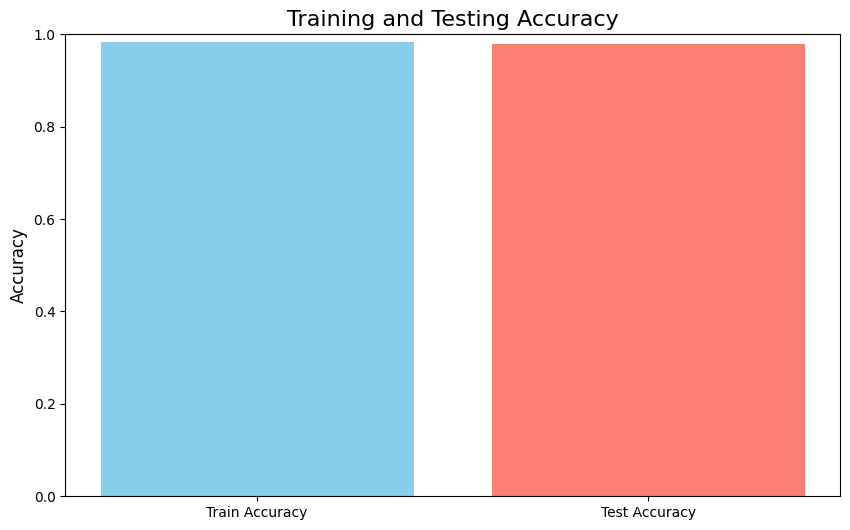

In [96]:
import matplotlib.pyplot as plt
# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=["skyblue", "salmon"])
plt.title("Training and Testing Accuracy", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.show()

In [97]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4009  123]
 [  20 2869]]


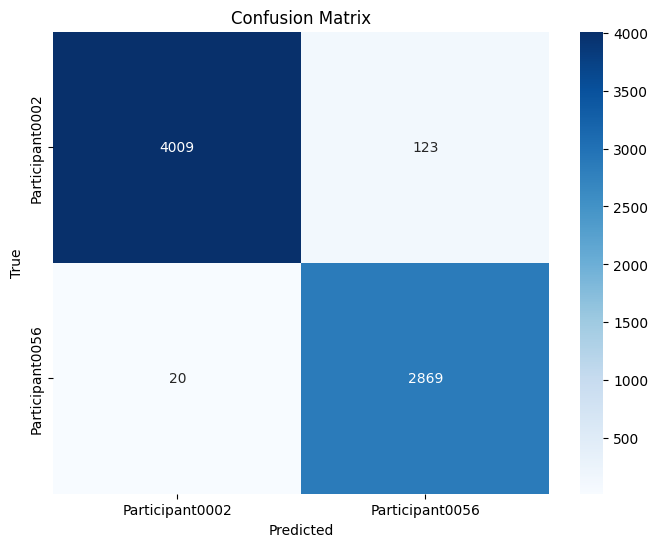

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

/tmp/ipykernel_4843/1758292960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


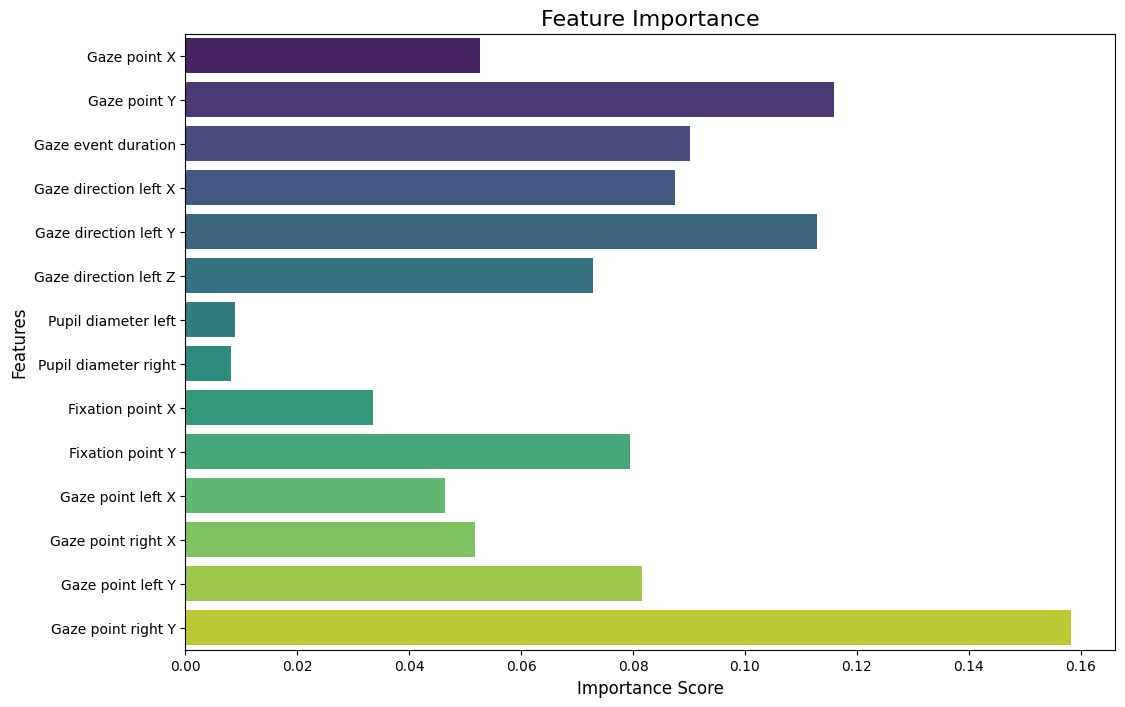

In [99]:
# Feature Importance
feature_importance = classifier.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

## Comparision of different models

In [100]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [101]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [102]:
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    #Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "AUC-ROC": auc
    }


Training Random Forest...
Training Logistic Regression...
Training K-Nearest Neighbors...
Training Decision Tree...
Training Gradient Boosting...


In [104]:
#dataframe for result comparision
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print(results_df)

                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Random Forest        0.979633   0.980163  0.979633  0.979682  0.997476
Decision Tree        0.978493   0.978992  0.978493  0.978544  0.995244
K-Nearest Neighbors  0.959550   0.960536  0.959550  0.959677  0.986632
Gradient Boosting    0.945022   0.945257  0.945022  0.945091  0.986828
Logistic Regression  0.827090   0.827072  0.827090  0.827081  0.890826


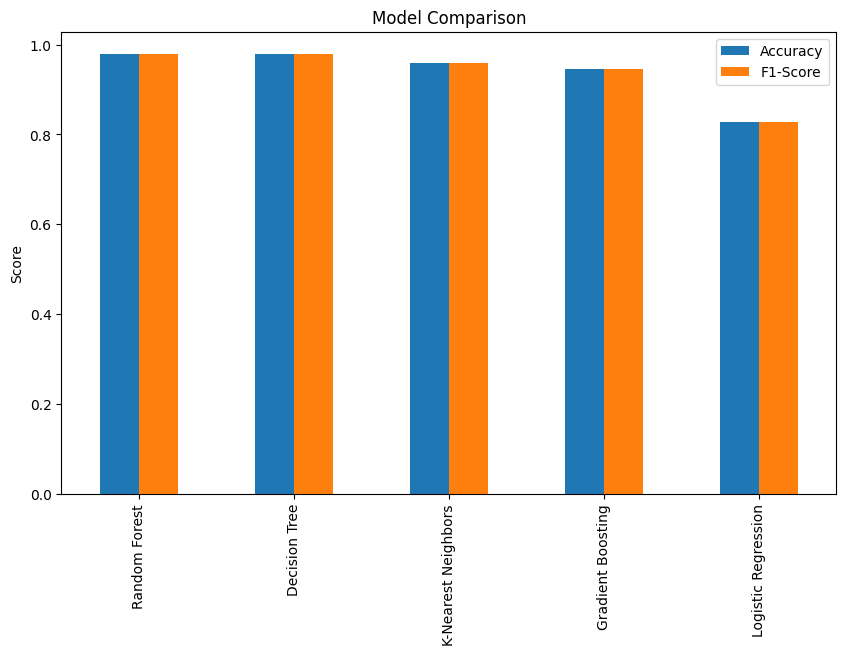

In [105]:
results_df[["Accuracy", "F1-Score"]].plot(kind="bar", figsize=(10, 6), title="Model Comparison")
plt.ylabel("Score")
plt.show()

In [ ]:
!pip install seaborn